### <h1> Task 3 <h1> (Отправка/получение сообщений разной длинны)

In [12]:
from IPython.display import display
import pandas as pd
from myplots import time_iter_plot
from doExperiments import DoExperiments

In [13]:
from pathlib import Path
import os

PATH_TO_MPI = Path("D:\\Projects\\CLion_Projects\\Projects_MPI\\cmake-build-debug\\openmpi_message.exe")
FILE_NAMES = ['data/OpenMPI/message_WithFeedback.csv', 'data/OpenMPI/message_NoFeedback.csv', 
              'data/OpenMPI/message_ASynchro.csv', 'data/OpenMPI/message_CommonMemory.csv']

# args_in_right_order[massage_len, mode]
for i, FILE_NAME in enumerate(FILE_NAMES):
    if not os.path.exists(FILE_NAME):
        exp = DoExperiments(exe_path=PATH_TO_MPI, 
                            from_n=2, to_n=2, 
                            from_iters=100, to_iters=1000, 
                            iter_step=100, step_mode="+",
                            args_in_right_order=[1000, i])
        exp.run(filename=FILE_NAME)
    else:
        print(f"File '{FILE_NAME}' already exists. Skipping function execution.")

File 'data/OpenMPI/message_WithFeedback.csv' already exists. Skipping function execution.
File 'data/OpenMPI/message_NoFeedback.csv' already exists. Skipping function execution.
File 'data/OpenMPI/message_ASynchro.csv' already exists. Skipping function execution.
File 'data/OpenMPI/message_CommonMemory.csv' already exists. Skipping function execution.


In [14]:
data_WithFeedback = pd.read_csv('data/OpenMPI/message_WithFeedback.csv')
data_NoFeedback = pd.read_csv('data/OpenMPI/message_NoFeedback.csv')
data_ASynchro = pd.read_csv('data/OpenMPI/message_ASynchro.csv')
data_CommonMemory = pd.read_csv('data/OpenMPI/message_CommonMemory.csv')
display(data_WithFeedback)
# display(data_NoFeedback)
# display(data_ASynchro)
# display(data_CommonMemory)

,Num_Threads,Iter,Time
0,2,100,793.6
1,2,200,1093.6
2,2,300,1038.6
3,2,400,1038.7
4,2,500,1185.4
...,...,...,...
95,2,9600,6187.3
96,2,9700,8350.8
97,2,9800,8678.5
98,2,9900,8410.1


In [15]:
labels = ['WithFeedback', 'NoFeedback', 'ASynchro', 'CommonMemory']

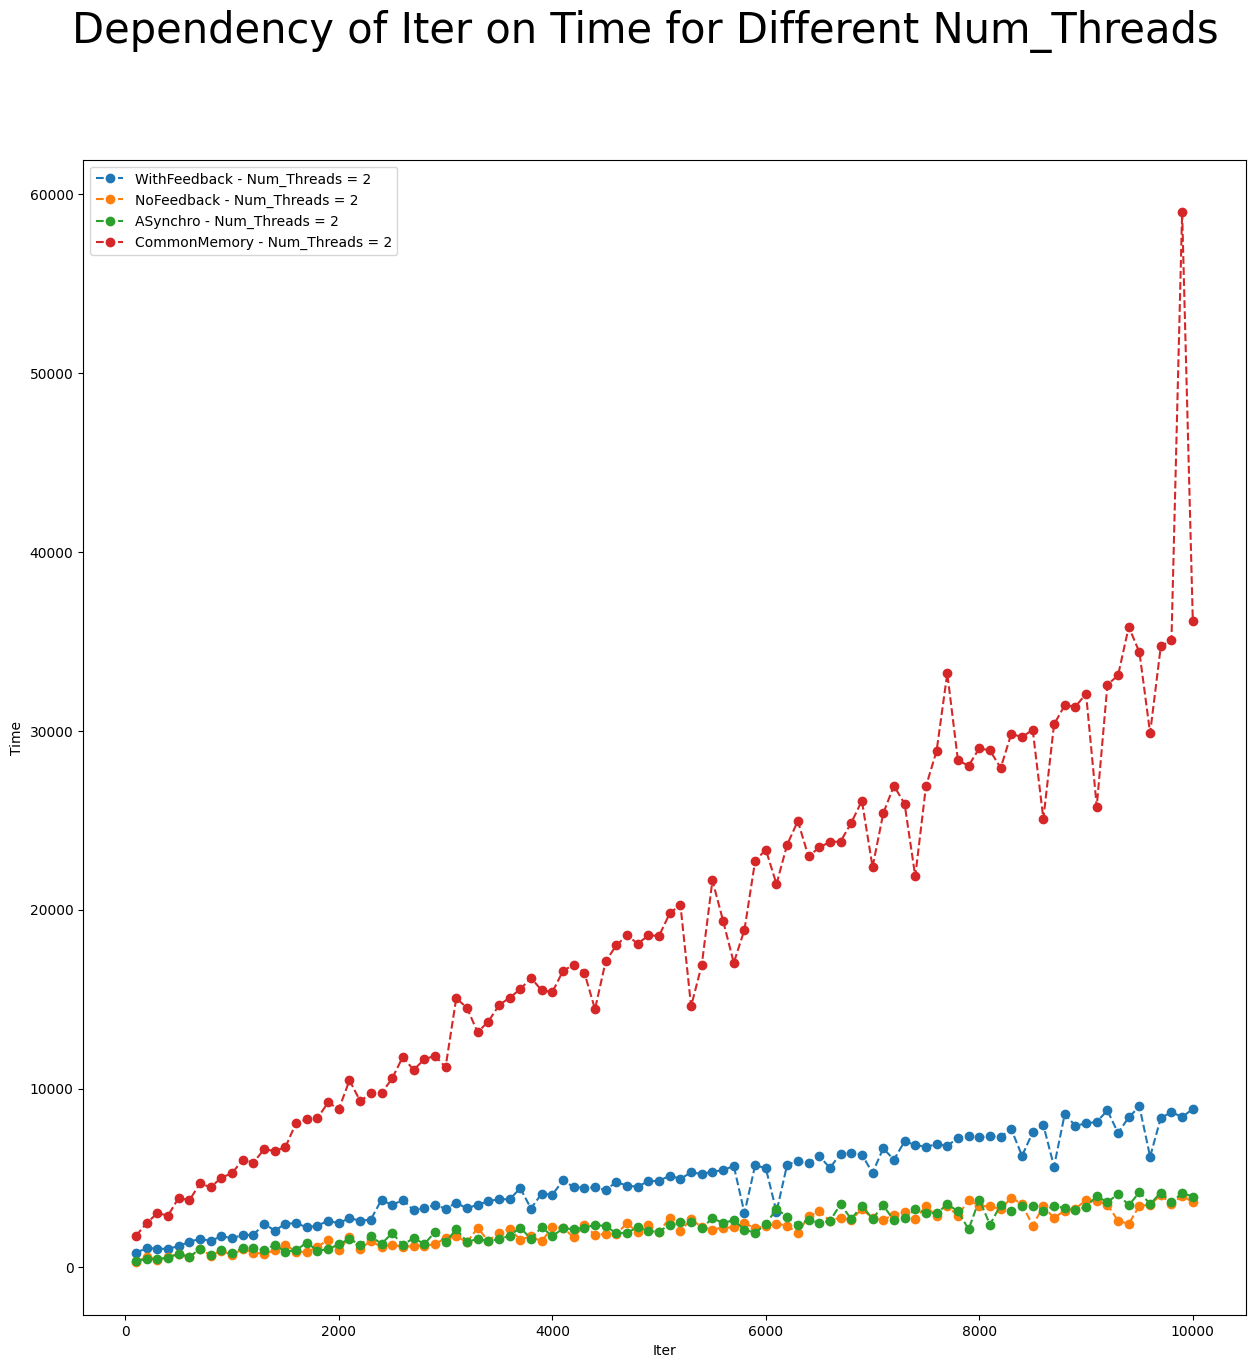

In [16]:
thread_groups_WithFeedback = data_WithFeedback.groupby('Num_Threads')
thread_groups_NoFeedback = data_NoFeedback.groupby('Num_Threads')
thread_groups_ASynchro = data_ASynchro.groupby('Num_Threads')
thread_groups_CommonMemory = data_CommonMemory.groupby('Num_Threads')

thread_groups = [thread_groups_WithFeedback, thread_groups_NoFeedback, 
                 thread_groups_ASynchro, thread_groups_CommonMemory]
time_iter_plot(thread_groups, labels=labels)

# Вывод:
Из представленных графиков наблюдается близкая к линейной зависимость между длинной сообщения и временем затраченным на его пересылку между двумя процессами и можно составить следующий рейтинг по режимам выполнения операций передачи данных:
1. MPI_Isend и MPI_Irecv (ASynchro).
2. MPI_Send и MPI_Recv (NoFeedback).
3. MPI_Ssend и MPI_Recv (WithFeedback).
4. MPI_Put и MPI_Get (CommonMemory).

***
##### P.s. Это справедливо, если мы оцениваем результаты в целом (для разного кол-ва потоков и итераций) с перспективой масштабирования задачи. 